<a href="https://colab.research.google.com/github/Mwangi-dan/data-preprocessing_assignment/blob/main/ml_pipeline_Daniel_Ndungu_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Early Detection of Gastric Cancer in Endoscopy
## 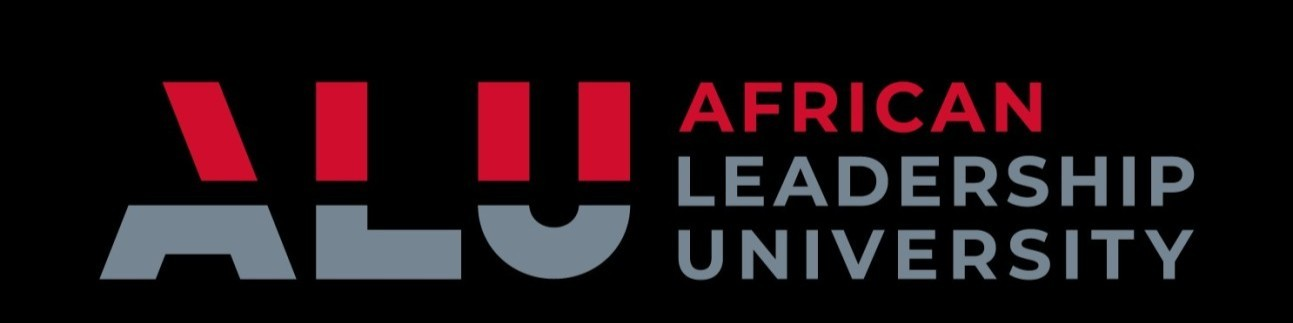

## Student Name: Daniel Mwangi Ndungu

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

  The primary dataset for this project is  the Kvasir dataset since it has annotated images that have been verified by qualified medical doctors

   [Kvasir Dataset](https://datasets.simula.no/kvasir/)
   
   Additional dataset:

  This dataset required a subscriptioon to access it that is why it was under-utilized but is still a good one to use.
  
  EndoVis Dataset | https://endovissub-instrument.grand-challenge.org/

   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

      * Aggregation may be necessary if the Kvasir dataset lacks representation of certain lesion types, early-stage cancer cases, or demographic diversity.
      *  To ensure the model works well across different medical devices, imaging protocols, and regions, aggregating datasets from multiple institutions or public sources can improve performance and clinical relevance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/kvasir-dataset/Model_data'



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current format:**
 - The Kvasir dataset consists of labeled images in various resolutions stored as JPEG/PNG files, organized in folders by class (e.g., lesion types).

 **Planned Transformation**
 - Images will be resized to a unified resolution (128x128 pixels) and normalized (pixel values scaled between 0 and 1). Class labels will be encoded into numeric categories for compatibility with machine learning models.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
    
      - Image Data: Visual representations of gastrointestinal conditions, including lesions, normal tissue, and various other medical conditions.
      - Labels: Corresponding to different categories (e.g., healthy tissue, specific lesion types like polyps, ulcers, or cancerous regions).
  
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
      - Image Characteristics: Varying resolutions and lighting conditions highlight the need for preprocessing and augmentation to standardize the data.
      - Correlations: Certain visual features like color intensity correlate strongly with specific class labels.
      - Class Distribution: Certain classes are overrepresented compared to others. This imbalance could impact model performance.
   
  **Insert code for data exploration below**


Class Distribution: Counter({'train': 1, 'validation': 1})


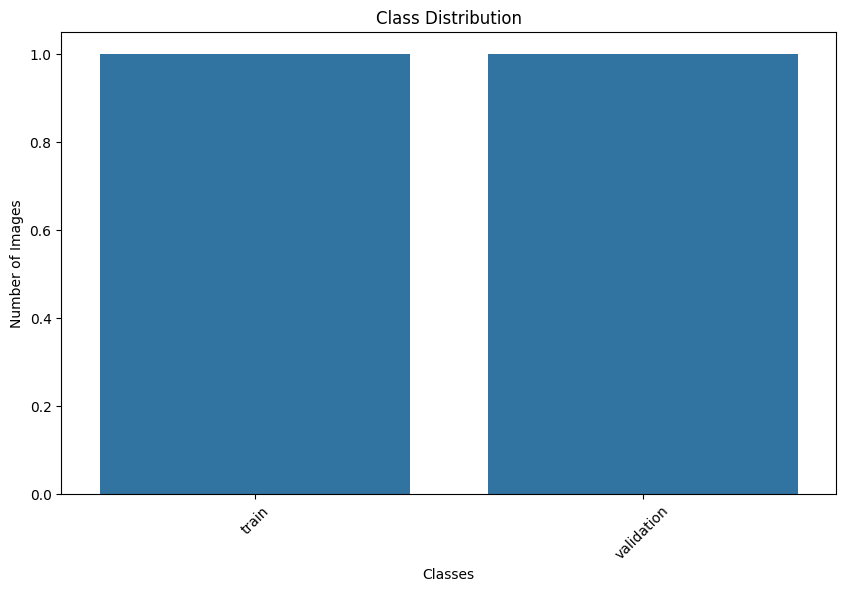

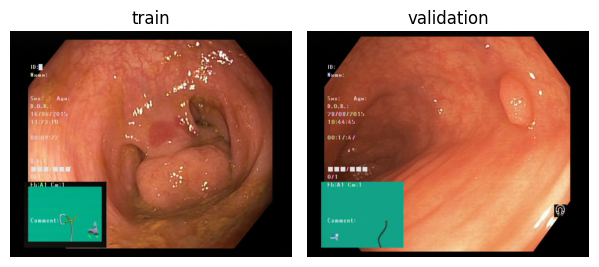

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import cv2
import seaborn as sns

# Path to dataset
dataset_dir = base_dir + '/training_dataset/'

# Check class distribution
class_counts = Counter([folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))])
print("Class Distribution:", class_counts)

# Plotting class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Displaying sample images from each class
plt.figure(figsize=(15, 10))
for i, cls in enumerate(class_counts.keys()):
    sample_image_path = os.path.join(dataset_dir, cls, os.listdir(os.path.join(dataset_dir, cls))[0])
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 5, i+1)
    plt.imshow(sample_image)
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

  *Prexisting Hypotheses*
      - Early-stage gastric cancer lesions exhibit distinct visual patterns like shape and color that can be identified using machine learning models.
      - Class imbalance in the dataset negatively impacts model accuracy, leading to biased predictions toward majority classes.

  *Methodologies to test Hypothese above*
      - Train a convolutional neural network (CNN) on the dataset to classify images. Evaluate model accuracy, precision, recall, and F1 score, particularly for the gastric cancer class. This will determine if the model can effectively distinguish cancerous images.
      - Use techniques like oversampling, undersampling, or weighted loss functions to balance the classes. Compare metrics before and after balancing to quantify the influence of class distribution.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
      * Evaluate whether the dataset is sparse (underrepresented samples in certain classes) or dense (large representation across all classes).
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.
      * Use data augmentation to artificially increase the number of samples in underrepresented classes.
      * Apply transfer learning with pre-trained models to improve performance on smaller datasets.
      * Focus on selecting representative subsets for faster training without sacrificing model performance.
      * Identify using visual inspection or statistical thresholds to reduce outliers



Class Counts: {'train': 63, 'validation': 47}


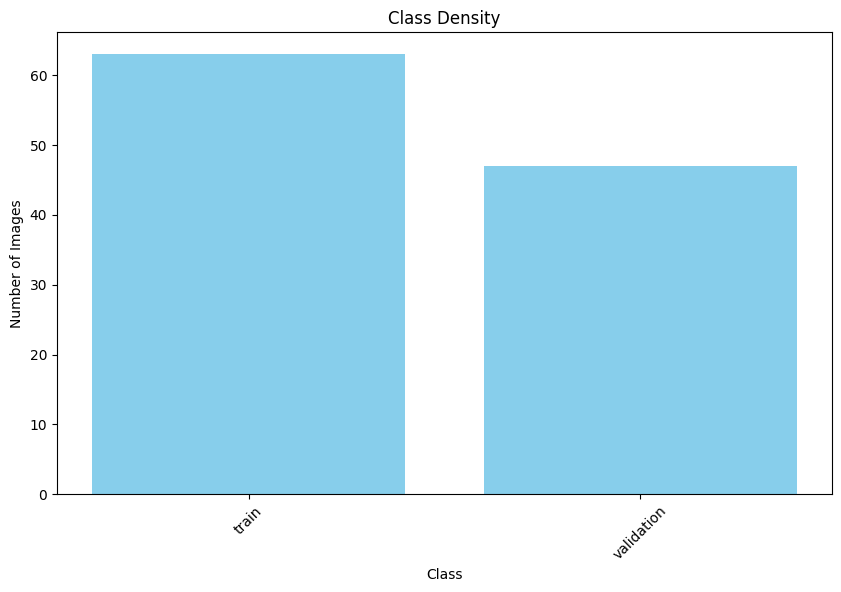

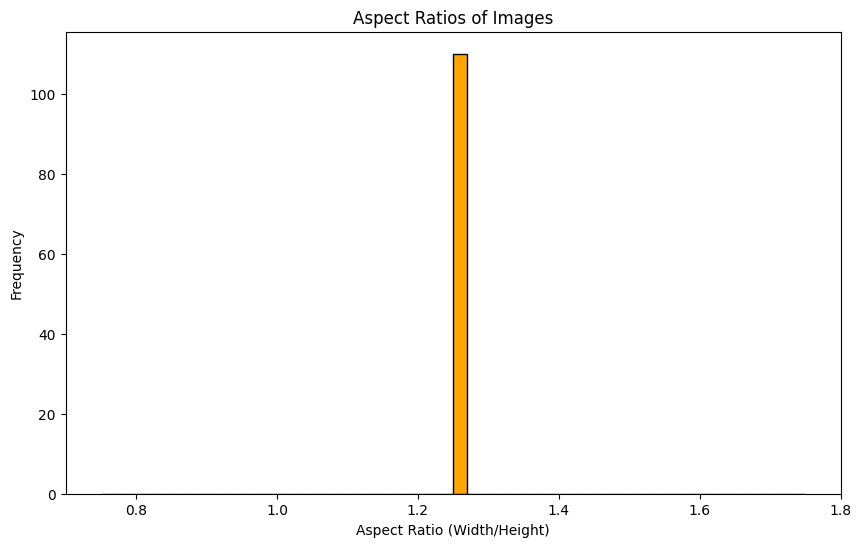

Detected 0 outliers based on aspect ratios.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path to dataset
dataset_dir = base_dir + '/training_dataset/'

# Assess density: Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_dir, cls))) for cls in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, cls))}
print("Class Counts:", class_counts)

# Plotting class density
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Density")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

# Handling Outliers: Checking image sizes and aspect ratios
image_sizes = []
for cls in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, cls)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert sizes to numpy array for analysis
image_sizes = np.array(image_sizes)
aspect_ratios = image_sizes[:, 0] / image_sizes[:, 1]

# Plot aspect ratios to detect anomalies
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=50, color='orange', edgecolor='black')
plt.title("Aspect Ratios of Images")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.show()

# Strategy: Flag outliers based on unusual aspect ratios (e.g., out of range)
outlier_threshold = (0.5, 2.0)
outliers = [(i, ratio) for i, ratio in enumerate(aspect_ratios) if ratio < outlier_threshold[0] or ratio > outlier_threshold[1]]
print(f"Detected {len(outliers)} outliers based on aspect ratios.")


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
      * Purpose of Splits:
        - Training Set: Used to train the model, typically 70-80% of the dataset.
        - Validation Set: Used to tune hyperparameters and evaluate the model during training, typically 10-15%.
        - Testing Set: Used for final evaluation of the model's performance, typically 10-15%.
   - Ensure randomness and representativeness in each subset.
      * Randomly shuffle the dataset to ensure no bias in the splits.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Class Distribution: {'train': 63, 'validation': 47}


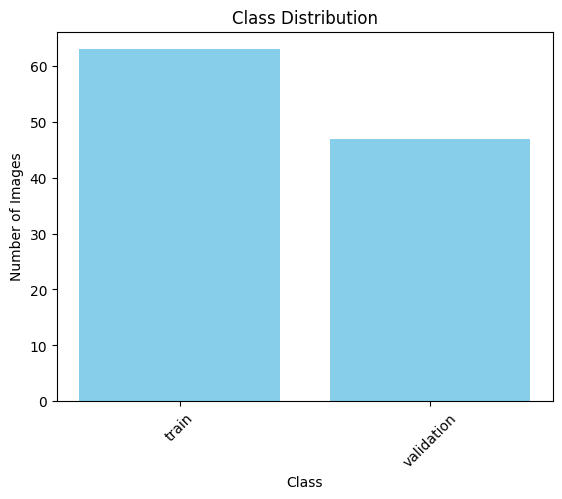

Class Weights: {'train': 0.873015873015873, 'validation': 1.1702127659574468}
Found 110 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np
import os


training_data = base_dir + '/training_dataset/train'
validation_data = base_dir + '/training_dataset/validation/'


# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(os.listdir(training_data)), activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Analyze Class Distribution
dataset_dir = base_dir + '/training_dataset/'
class_counts = {cls: len(os.listdir(os.path.join(dataset_dir, cls))) for cls in os.listdir(dataset_dir)}
print("Class Distribution:", class_counts)

# Visualize Class Distribution
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

# Mitigation: Calculate Class Weights
class_labels = list(class_counts.keys())
class_sample_counts = np.array(list(class_counts.values()))
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(class_labels),
    y=np.repeat(class_labels, class_sample_counts)
)
class_weights_dict = dict(zip(class_labels, class_weights))
print("Class Weights:", class_weights_dict)

# Prepare Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Train the model with class weights
# history = model.fit(
#     training_data,
#     validation_data=val_data,
#     epochs=10,
#     class_weight=class_weights_dict
# )


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

      - For image-based models, feature extraction occurs through the convolutional layers. These layers identify patterns such as edges, textures, and colors. To rank their significance, we can use Grad-CAM for interpretability and visualization.


9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming the model is a Sequential or functional API model
model = tf.keras.models.load_model('/content/vanilla_cnn_model.keras')

# Fix: Call the model with dummy data to initialize it
dummy_input = np.random.rand(1, 128, 128, 3)  # Replace with the actual input shape of your model
_ = model(dummy_input)

# Select an image for Grad-CAM
img_path = base_dir + '/training_dataset/train/02c10865-9d23-4f6b-aa5d-f73b63b6d67f.jpg'
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Grad-CAM function
def grad_cam(model, img_array, layer_name):
    # output the desired intermediate layer and predictions
    grad_model = Model(inputs=[model.input],
                       outputs=[model.get_layer(layer_name).output, model.output])

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions)]
    grads = tape.gradient(loss, conv_outputs)

    # Pool gradients over the spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply weights with conv layer output and compute heatmap
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Visualize Grad-CAM
layer_name = 'conv2d_2'  # Replace with the actual convolutional layer name
heatmap = grad_cam(model, img_array, layer_name)



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.


      1. Normalization
        - Normalize pixel values in images to a standard range for faster convergence during training.
        - Normalize pixel intensity values to the range [0, 1] by dividing by 255.
      2. Encoding Categorical Variables
        - Convert image labels (cancerous, non-cancerous) into numerical values for model compatibility.
        - Use one-hot encoding for multiclass problems.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.


      1.  Save preprocessed images and their corresponding labels in formats like .h5 (HDF5)
      2. Cloud storage
        - Use Google Drive, AWS S3, or Google Cloud Storage for scalable and remote accessibility.

In [ ]:
# Data normaliztion
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalization
train_generator = datagen.flow_from_directory(
    base_dir + '/training_dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 110 images belonging to 2 classes.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Load a sample image
img_path = base_dir + '/training_dataset/train/02c10865-9d23-4f6b-aa5d-f73b63b6d67f.jpg'
img = load_img(img_path, target_size=(128, 128))  # Resize to 128x128
img_array = img_to_array(img)  # Convert image to array

# Normalization (Scaling pixel values to 0-1)
normalized_img = img_array / 255.0

# Check normalized values
print("Original Pixel Range:", np.min(img_array), "to", np.max(img_array))  # 0 to 255
print("Normalized Pixel Range:", np.min(normalized_img), "to", np.max(normalized_img))  # 0.0 to 1.0


Original Pixel Range: 0.0 to 255.0
Normalized Pixel Range: 0.0 to 1.0


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Encoding
labels = ['cancerous', 'non-cancerous', 'uncertain']
encoder = LabelBinarizer()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels)  # Outputs binary vectors for each class


[[1 0 0]
 [0 1 0]
 [0 0 1]]
